<a href="https://colab.research.google.com/github/AfrozSaqlain/Bayesian-Neural-Network/blob/main/GW_BNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
try:
  import torchbnn as bnn
except:
  !pip install torchbnn
  import torchbnn as bnn
import matplotlib.pyplot as plt

In [15]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) - 10 * x.pow(1) + 2 * torch.rand(x.size())

In [16]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

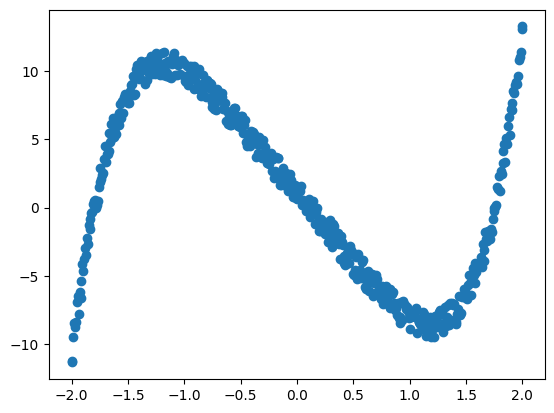

In [18]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [19]:
def clean_target(x):
    return x.pow(5) -10 * x.pow(1) + 1
def target(x):
    return x.pow(5) -10 * x.pow(1) + 2 * torch.rand(x.size())

In [20]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)

In [21]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [22]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

- MSE : 1.72, KL : 11.63


In [23]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [33]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])

In [35]:
models_result = models_result[:,:,0]

In [11]:
models_result = models_result.T

NameError: name 'models_result' is not defined

In [42]:
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

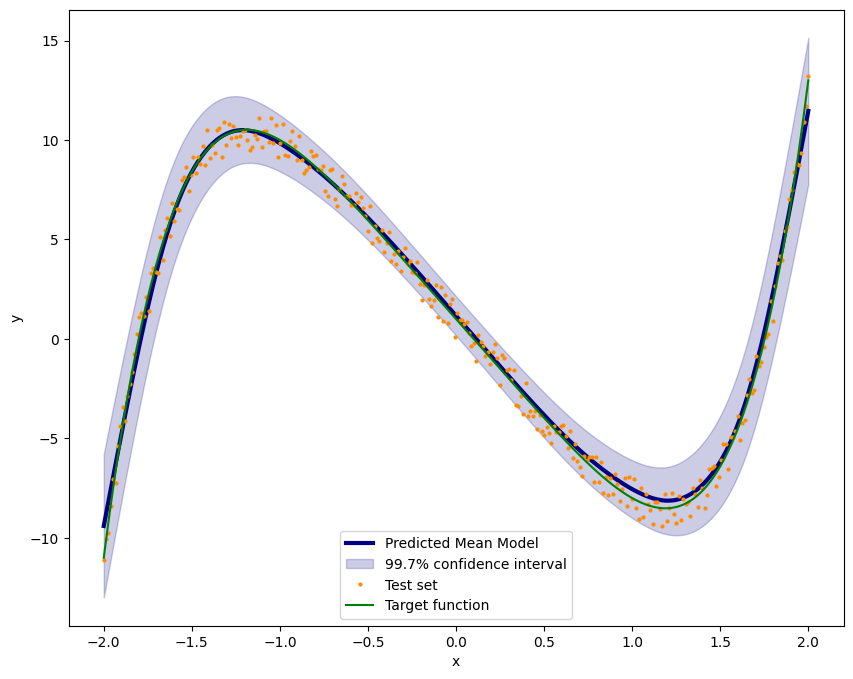

In [44]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
# plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [2]:
!pip install pycbc
from pycbc.types.timeseries import TimeSeries as ts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [3]:
from pycbc.waveform import get_td_waveform

In [48]:
hp, hc = get_td_waveform(approximant = "IMRPhenomPv2",
                         mass1=10,
                         mass2=30,
                         distance=10000,
                         f_lower=20,
                         delta_t=1.0/4096)

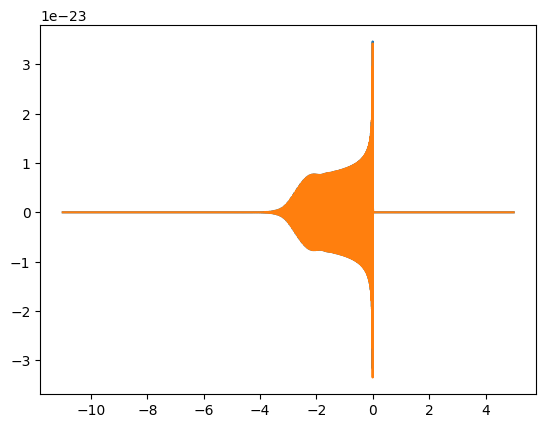

65536

In [49]:
plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)
plt.show()
len(hp)

In [67]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=len(hp), out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=3),
)

In [52]:
hp = hp.numpy()
hp = torch.tensor(hp)
hp = hp.float()

In [53]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [57]:
for i in range(2000):
  model.train()
  model.to(device)
  pre = model(hp.to(device))
  mse = mse_loss(pre, torch.tensor([10, 30, 10000], dtype = torch.float32, device = device))
  kl = kl_loss(model)
  cost = mse + kl
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

  # if i % 50 == 0 and i != 0:
  #     print(model(hp.to(device)))

In [58]:
model.eval()
model(hp.to(device))

tensor([  16.7889,   37.6491, 9994.0527], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [11]:
model.eval()
models_result = np.array([model(hp.to(device)).cpu().data.numpy() for k in range(10)])
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

AttributeError: 'TimeSeries' object has no attribute 'to'

tensor([[-2.3913e-24, -2.3654e-24, -2.3355e-24,  ..., -2.4666e-24,
         -2.4432e-24, -2.4169e-24]])

# Full training

In [9]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=65536, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=2000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2000, out_features=2)
)

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

for j in range(100):
  mass1 = np.random.randint(10, 100)
  mass2 = np.random.randint(10, 100)
  hp, _ = get_td_waveform(approximant = "IMRPhenomPv2",
                         mass1=mass1,
                         mass2=mass2,
                         f_lower=20,
                         delta_t=1.0/4096)

  if len(hp) != 65536:
    pass
  else:
    hp = hp.numpy()
    hp = torch.tensor(hp)
    hp = hp.float()

    for i in range(200):
      model.train()
      model.to(device)
      pre = model(hp.to(device))
      mse = mse_loss(pre, torch.tensor([mass1, mass2], dtype = torch.float32, device = device))
      kl = kl_loss(model)
      cost = mse + kl
      optimizer.zero_grad()
      cost.backward()
      optimizer.step()

      print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

      if j % 50 == 0 and j != 0:
          print(model(hp.to(device)))

Streaming output truncated to the last 5000 lines.
- MSE : 134.35, KL : 0.02
- MSE : 186.09, KL : 0.02
- MSE : 136.61, KL : 0.02
- MSE : 129.34, KL : 0.02
- MSE : 146.94, KL : 0.02
- MSE : 117.40, KL : 0.02
- MSE : 110.29, KL : 0.02
- MSE : 77.14, KL : 0.02
- MSE : 56.48, KL : 0.02
- MSE : 66.86, KL : 0.02
- MSE : 55.56, KL : 0.02
- MSE : 42.92, KL : 0.02
- MSE : 25.13, KL : 0.02
- MSE : 25.68, KL : 0.02
- MSE : 17.57, KL : 0.02
- MSE : 10.36, KL : 0.02
- MSE : 7.75, KL : 0.02
- MSE : 8.44, KL : 0.02
- MSE : 7.35, KL : 0.02
- MSE : 4.99, KL : 0.02
- MSE : 1.45, KL : 0.02
- MSE : 2.16, KL : 0.02
- MSE : 1.64, KL : 0.02
- MSE : 0.47, KL : 0.02
- MSE : 4.27, KL : 0.02
- MSE : 6.05, KL : 0.02
- MSE : 1.68, KL : 0.02
- MSE : 2.82, KL : 0.02
- MSE : 3.04, KL : 0.02
- MSE : 6.52, KL : 0.02
- MSE : 3.64, KL : 0.02
- MSE : 4.49, KL : 0.02
- MSE : 4.41, KL : 0.02
- MSE : 8.17, KL : 0.02
- MSE : 2.21, KL : 0.02
- MSE : 5.25, KL : 0.02
- MSE : 2.27, KL : 0.02
- MSE : 4.44, KL : 0.02
- MSE : 4.18, 

In [16]:
hp2, _ = get_td_waveform(approximant = "IMRPhenomPv2",
                         mass1=10,
                         mass2=40,
                         f_lower=20,
                         delta_t=1.0/4096)

hp2 = hp2.numpy()
hp2 = torch.tensor(hp2)
hp2 = hp2.float()

model.eval()
models_result = np.array([model(hp2.to(device)).cpu().data.numpy() for k in range(100)])
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

In [17]:
mean_values, std_values

(array([12.96541, 36.89485], dtype=float32),
 array([0.75581634, 0.6449802 ], dtype=float32))